In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf


import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


2023-01-31 14:03:26.830421: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Import our input dataset
suicide_df = pd.read_csv('Resources/Suicide-Avr.csv')
suicide_df.head()

,LocationTime,Suicide_val_TOT,Alcohol_val,Edu_val_BUPPSRY,Edu_val_TRY,Edu_val_UPPSRY,employment_val_TOT_PC_WKGPOP,employment_val_TOT_THND_PER,hSpend_val_COMPULSORY,hSpend_val_OOPEXP,...,Poverty_Value_66MORE,Poverty_Value_TOT,smoking_val,Value_PRIV_PC_GDP,Value_PUB_PC_GDP,Value_PUB_USD_CAP,Value_PUBNET_PC_GDP,Value_TOTNET_PC_GDP,Social_spt_val,Work_Hour_Value_TOT
0,ARG-1990,9,9,29,28.372829,42.537433,66.362126,16354,596.529764,151.140277,...,0.135574,0,22.146535,2.708838,18.987507,7150.795485,17.667929,20,87,1753
1,ARG-1991,8,9,29,28.372829,42.537433,66.362126,16354,596.529764,151.140277,...,0.135574,0,22.146535,2.708838,18.987507,7150.795485,17.667929,20,87,1753
2,ARG-1992,9,9,29,28.372829,42.537433,66.362126,16354,596.529764,151.140277,...,0.135574,0,22.146535,2.708838,18.987507,7150.795485,17.667929,20,87,1753
3,ARG-1993,9,9,29,28.372829,42.537433,66.362126,16354,596.529764,151.140277,...,0.135574,0,22.146535,2.708838,18.987507,7150.795485,17.667929,20,87,1753
4,ARG-1994,8,9,29,28.372829,42.537433,66.362126,16354,596.529764,151.140277,...,0.135574,0,22.146535,2.708838,18.987507,7150.795485,17.667929,20,87,1753


In [3]:
# Check datatypes
suicide_df.dtypes

LocationTime                     object
Suicide_val_TOT                   int64
Alcohol_val                       int64
Edu_val_BUPPSRY                   int64
Edu_val_TRY                     float64
Edu_val_UPPSRY                  float64
employment_val_TOT_PC_WKGPOP    float64
employment_val_TOT_THND_PER       int64
hSpend_val_COMPULSORY           float64
hSpend_val_OOPEXP               float64
hSpend_val_TOT                  float64
hSpend_val_VOLUNTARY            float64
obesity_val                     float64
Poverty_Value_0_17              float64
Poverty_Value_18_65             float64
Poverty_Value_66MORE            float64
Poverty_Value_TOT                 int64
smoking_val                     float64
Value_PRIV_PC_GDP               float64
Value_PUB_PC_GDP                float64
Value_PUB_USD_CAP               float64
Value_PUBNET_PC_GDP             float64
Value_TOTNET_PC_GDP               int64
Social_spt_val                    int64
Work_Hour_Value_TOT               int64


In [4]:
# Finding out the correlation between the features
corr = suicide_df.corr()
corr.shape

(24, 24)

<AxesSubplot:>

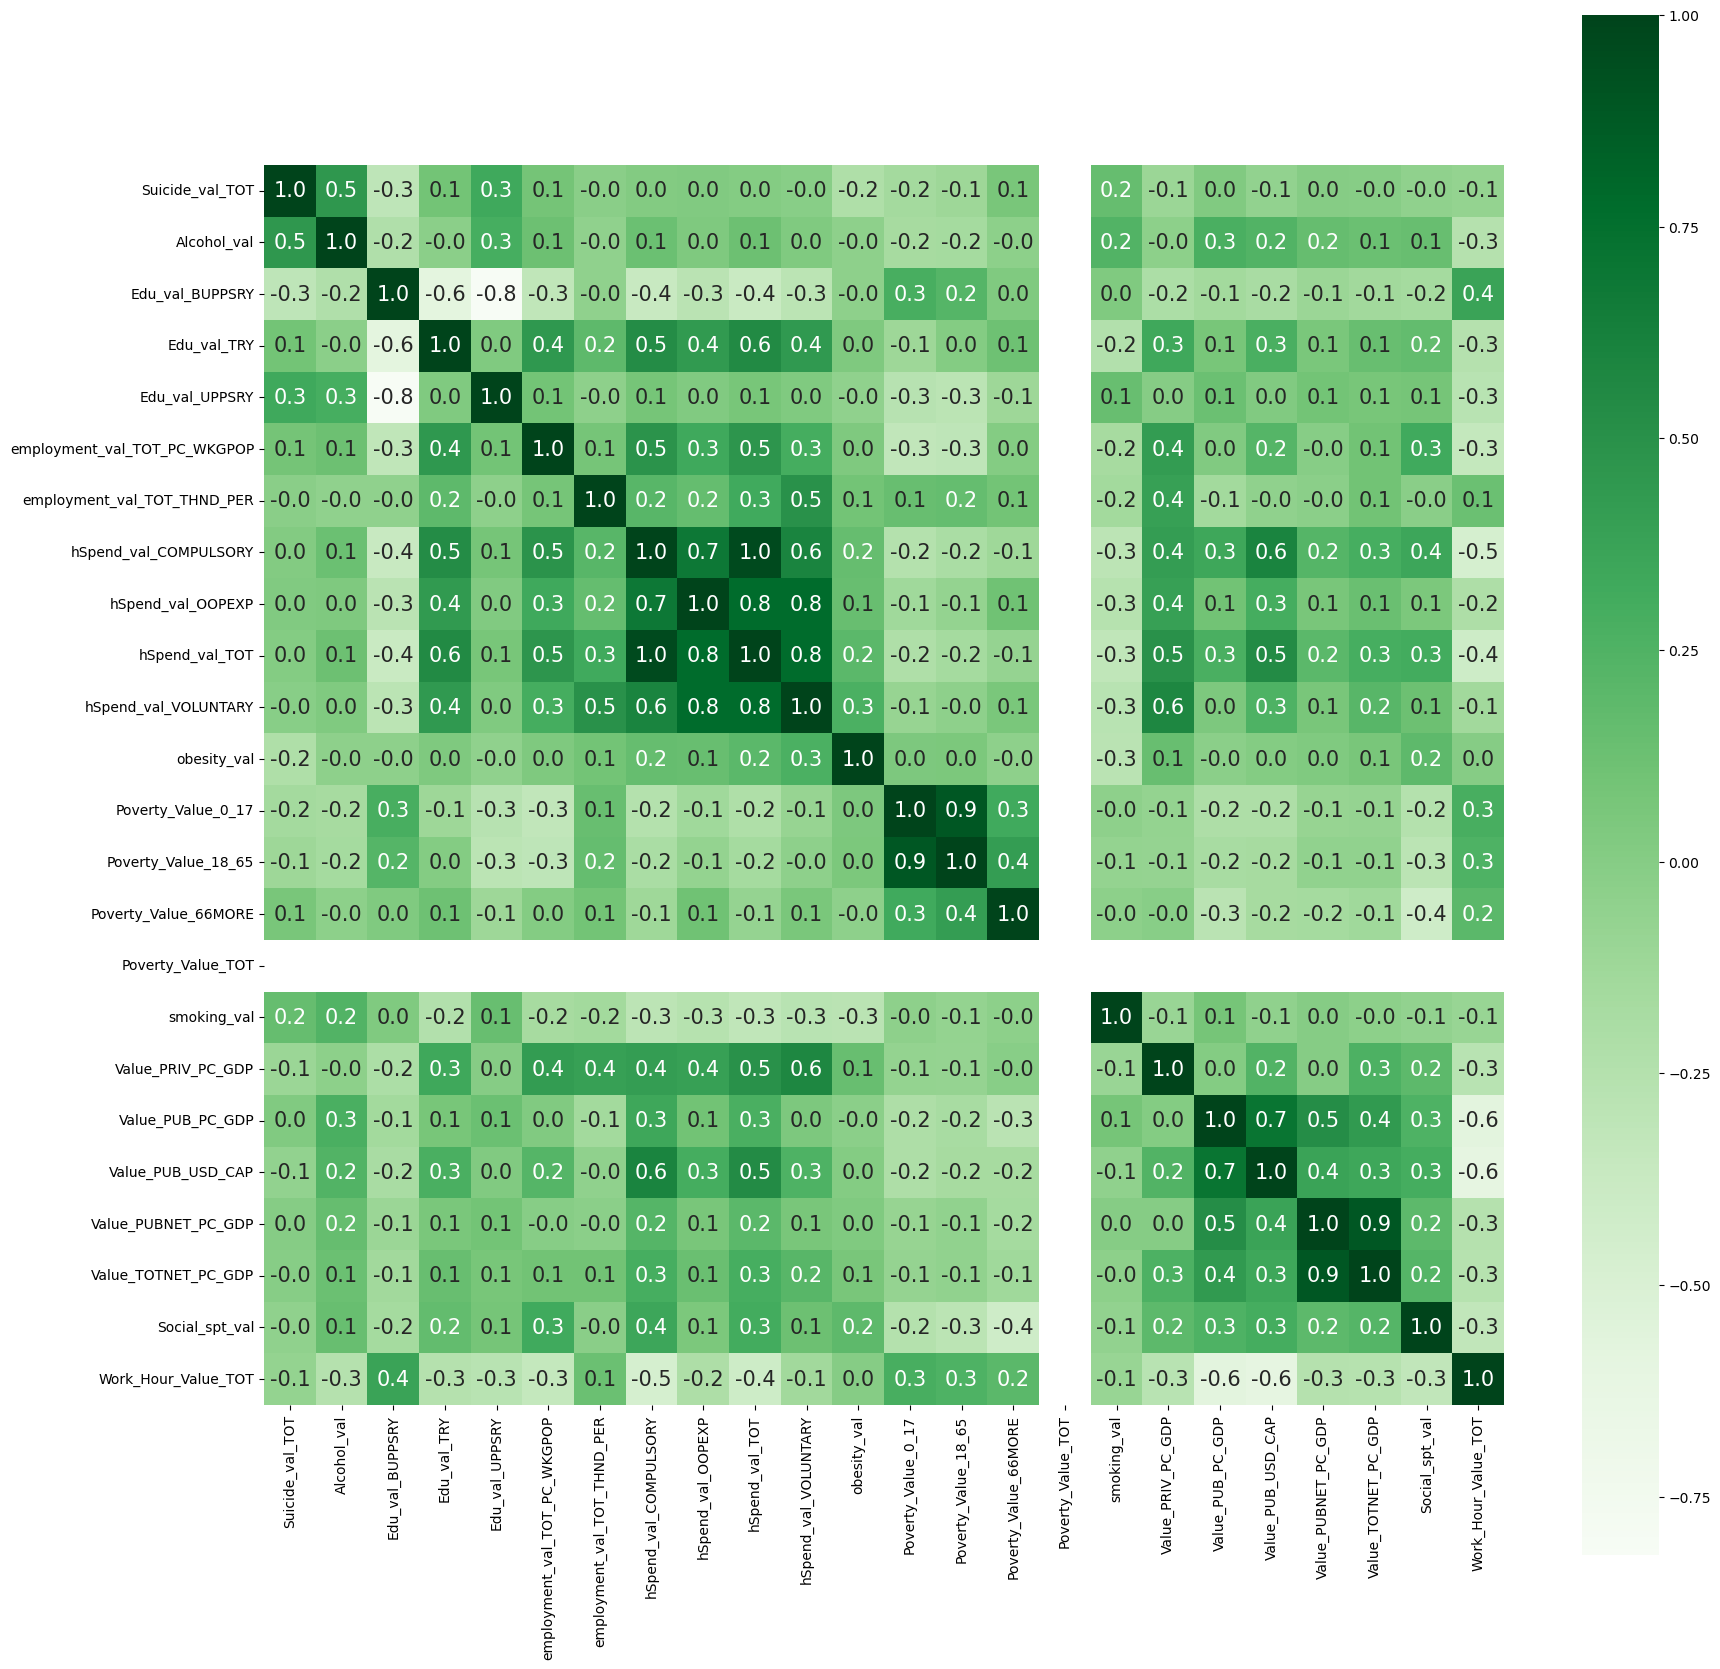

In [5]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [6]:
# Spliting target variable and independent variables
X = suicide_df.drop(['Suicide_val_TOT', 'LocationTime'], axis = 1)
y = suicide_df['Suicide_val_TOT']

In [7]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [16]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor(n_estimators=100)

# Train the model using the training sets 
reg.fit(X_train, y_train)

RandomForestRegressor()

In [17]:
# Model Evaluation
# Model prediction on train data
y_pred = reg.predict(X_train)

In [18]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.88522573150271
Adjusted R^2: 0.8823152483985891
MAE: 1.1354442054328884
MSE: 8.841259491670437
RMSE: 2.9734255483651237


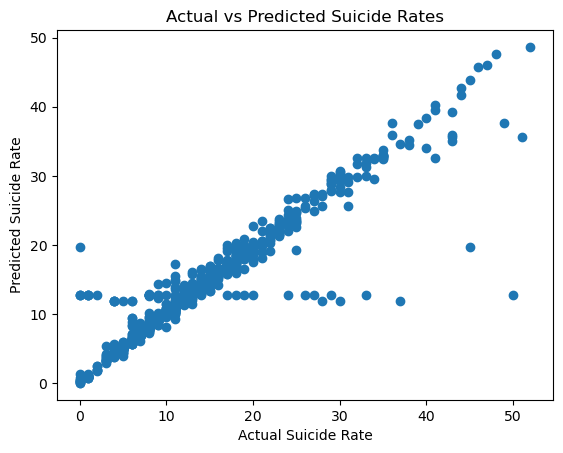

In [19]:
# Visualizing the differences between actual suicide rates and predicted suicide rates
plt.scatter(y_train, y_pred)
plt.xlabel("Actual Suicide Rate")
plt.ylabel("Predicted Suicide Rate")
plt.title("Actual vs Predicted Suicide Rates")
plt.show()

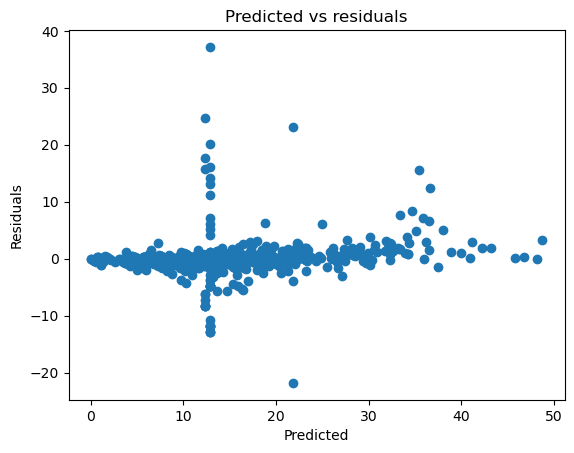

In [12]:
# Checking residuals, Error of models prediction
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()



In [13]:
# For test data

# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [14]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.768585151390219
Adjusted R^2: 0.7544294558635568
MAE: 2.1534092534277987
MSE: 18.344017849077517
RMSE: 4.282991693790395


In [20]:
# Get the feature importance 
reg.feature_importances_

array([0.17830292, 0.01137929, 0.01737004, 0.17491865, 0.02613003,
       0.07201995, 0.06728088, 0.01697926, 0.03268687, 0.01795549,
       0.06666932, 0.00906714, 0.00365063, 0.00408575, 0.        ,
       0.00683222, 0.10090139, 0.04017798, 0.05088403, 0.00069529,
       0.00074647, 0.00289032, 0.09837608])

Index(['Suicide_val_TOT', 'Alcohol_val', 'Edu_val_BUPPSRY', 'Edu_val_TRY',
       'Edu_val_UPPSRY', 'employment_val_TOT_PC_WKGPOP',
       'employment_val_TOT_THND_PER', 'hSpend_val_COMPULSORY',
       'hSpend_val_OOPEXP', 'hSpend_val_TOT', 'hSpend_val_VOLUNTARY',
       'obesity_val', 'Poverty_Value_0_17', 'Poverty_Value_18_65',
       'Poverty_Value_66MORE', 'Poverty_Value_TOT', 'smoking_val',
       'Value_PRIV_PC_GDP', 'Value_PUB_PC_GDP', 'Value_PUB_USD_CAP',
       'Value_PUBNET_PC_GDP', 'Value_TOTNET_PC_GDP', 'Social_spt_val',
       'Work_Hour_Value_TOT'],
      dtype='object')


ValueError: shape mismatch: objects cannot be broadcast to a single shape

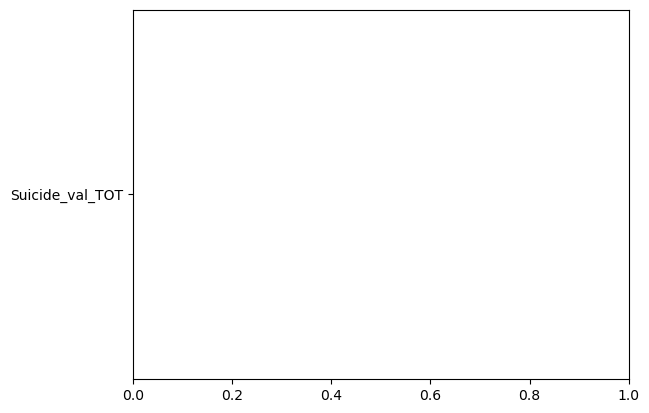

In [26]:
# Built-In Feature importance 
suicide1_df = suicide_df.drop(columns=['LocationTime'])
cols = suicide1_df.columns
print(cols)
plt.barh(cols, reg.feature_importances_)